## Basic Image Processing with OpenCV

OpenCV (short for open source computer vision) is a library for handling a number of image processing and object detection tasks. The OpenCV library can be used in a number of other environments such as C++, Java and of course, python. While the library is very powerful (and complicated as we get deeper!), it makes image processing accessible to everyone in the world of programming. Here, we're particularly interested in using OpenCV, in conjunction with other libraries such as scikit-learn and tensorflow, for builing machine learning models. 

It's worth mentioning that scikit-learn (sklearn) has its own AV processing libraries which can handline audio, video and image data, and a number of third-party open source libraries are available for this that are built to work with tensorflow. (The Keras/tensorflow wrapper comes with a few of its own image processing capabilities too!) So there are lots of options to handle AV data, but OpenCV provides a standard architecture that can be translated across platforms (with syntactic modifications) and made more widely available. Let's start with some basic image processing.

Installing OpenCV for python is a little more complicated than using a pip or conda install. Not all versions of opencv are compatible with all versions of python. We'll need to make use of a custom repository to locate the required libraries, the most commonly used is: https://www.lfd.uci.edu/~gohlke/pythonlibs/. Here's a quick guide to installing opencv: https://kirr.co/pcbq03 (Just to be sure, it's recommended to install opencv in a new python environment.)

In [ ]:
#Import required libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cv2
import skvideo #to be used in the expanded notebook

In [3]:
import pylab 
pylab.rcParams['figure.figsize'] = (12.0, 25.0) #global settings for plots

In [4]:
#plt.figure(figsize=(10,16))
# read an image
qcity = cv2.imread('images/Quebec-City-48987.jpg')

In [5]:
qcity.shape

#the shape indicates the dimensions and the pixel coloring (i.e. 3, RGB/BGR)
#note that opencv stores images in the BGR format as opposed to RGB format

(526, 936, 3)

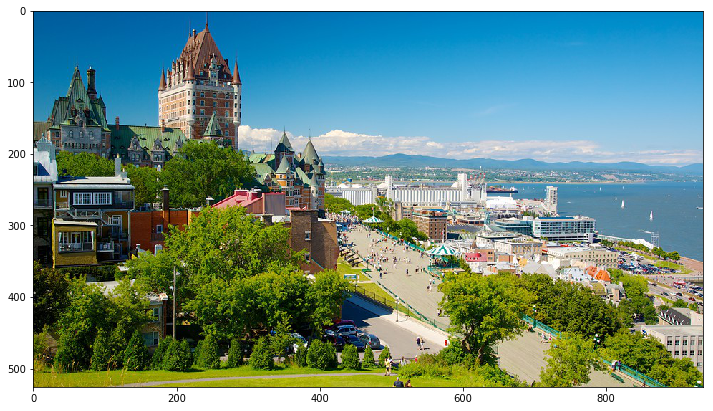

In [6]:
plt.imshow(cv2.cvtColor(qcity, cv2.COLOR_BGR2RGB))

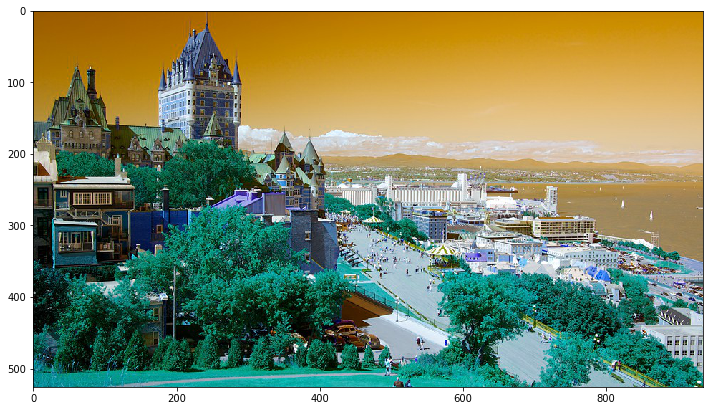

In [7]:
#plotting the raw image (with no conversions)
plt.imshow(qcity)

#### Greyscaling



In [8]:
#transforming the image to grayscale
gray_qcity = cv2.cvtColor(qcity, cv2.COLOR_RGB2GRAY)

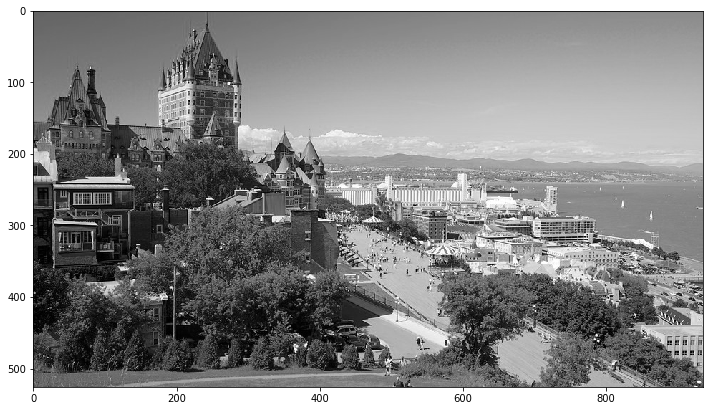

In [9]:
plt.imshow(cv2.cvtColor(gray_qcity, cv2.COLOR_GRAY2RGB))

In [10]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(qcity, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0) #axis=1 finds average across columns

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[119 129  93]


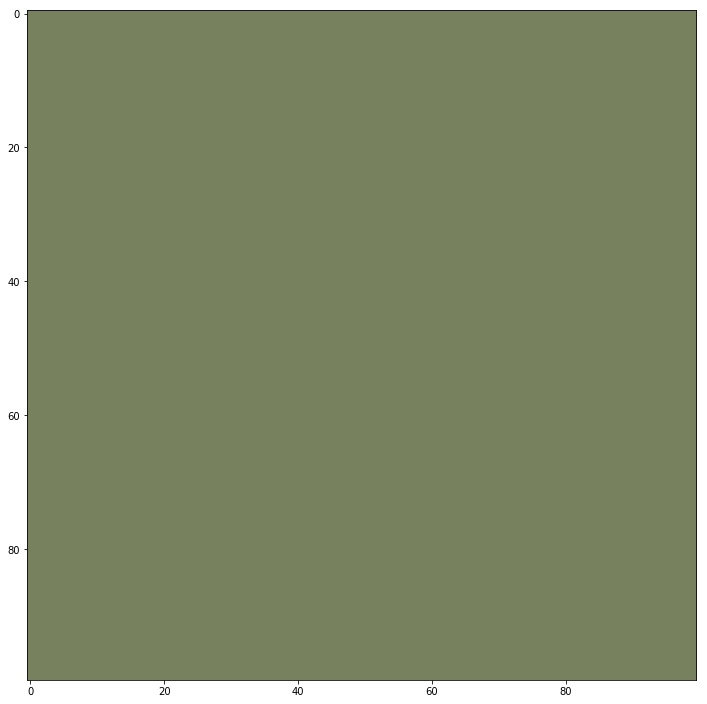

In [11]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

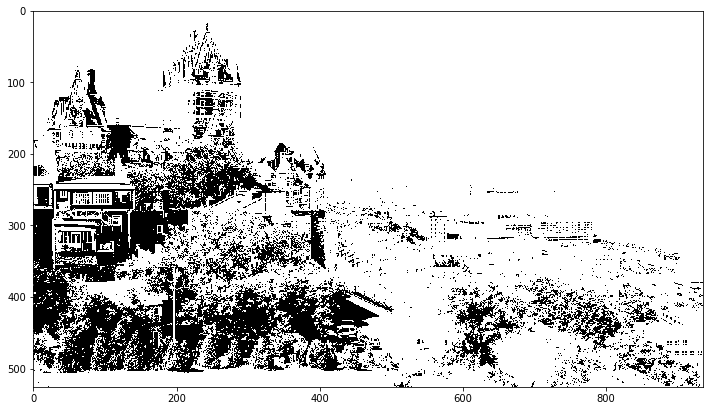

In [12]:
# threshold for grayscale image
_, threshold_qcity = cv2.threshold(gray_qcity, 60, 255, cv2.THRESH_BINARY)

threshold_qcity = cv2.cvtColor(threshold_qcity, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_qcity)

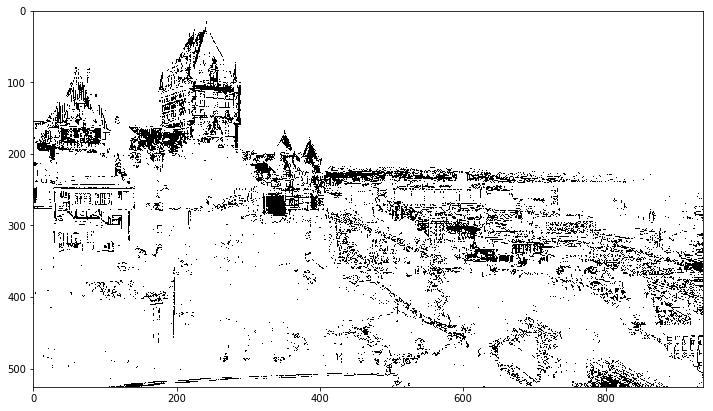

In [13]:
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)

mask_inverse = cv2.inRange(qcity, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

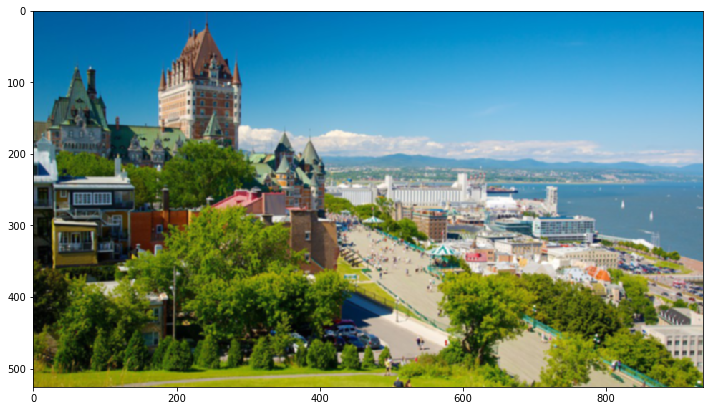

In [14]:
# preproccess with blurring, with 5x5 kernel
qcity_blur_small = cv2.GaussianBlur(qcity, (5,5), 0)
cv2.imwrite('output/qcity-gaussian-blur-5.jpg', qcity_blur_small)

plt.imshow(cv2.cvtColor(qcity_blur_small, cv2.COLOR_BGR2RGB))

True

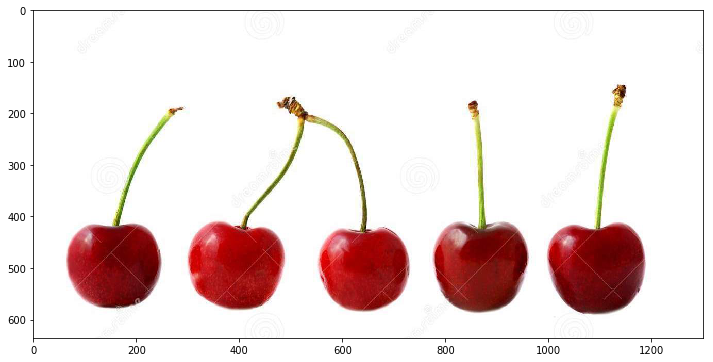

In [15]:
cherries = cv2.imread('images/cherries.jpg')
plt.imshow(cv2.cvtColor(cherries, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cherries-orig.jpg', cherries)

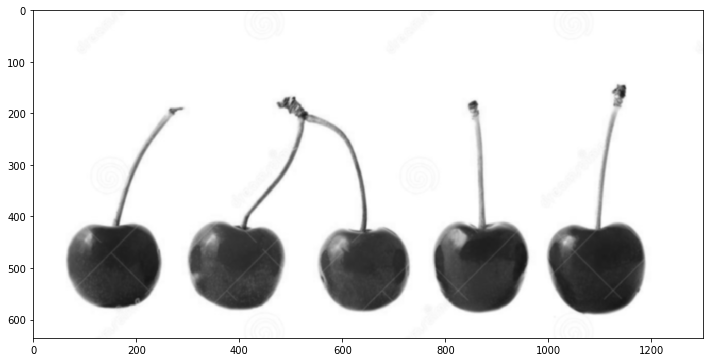

In [16]:
# get binary image and apply Gaussian blur
cherries_gray = cv2.cvtColor(cherries, cv2.COLOR_BGR2GRAY)
cherries_preprocessed = cv2.GaussianBlur(cherries_gray, (7, 7), 0)

plt.imshow(cv2.cvtColor(cherries_preprocessed, cv2.COLOR_GRAY2RGB))

True

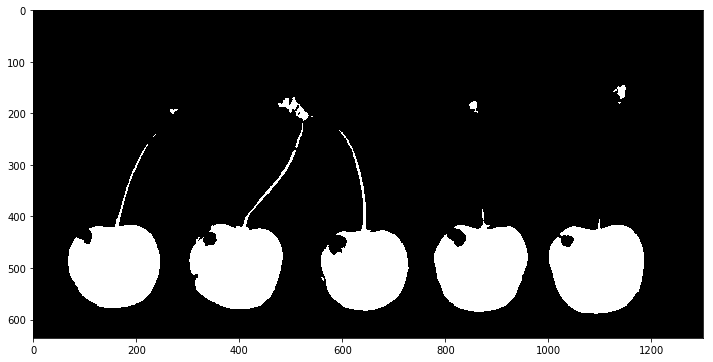

In [17]:
_, cherries_binary = cv2.threshold(cherries_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get cherries
cherries_binary = cv2.bitwise_not(cherries_binary)
plt.imshow(cv2.cvtColor(cherries_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cherries-binary.png', cherries_binary)

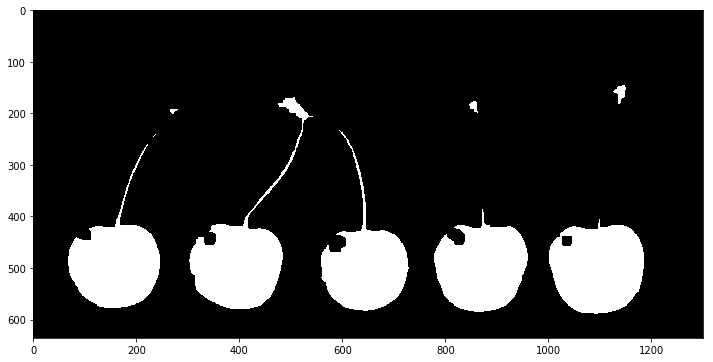

In [18]:
# morph cherries by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
cherries_morph = cv2.morphologyEx(cherries_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(cherries_morph, cv2.COLOR_GRAY2RGB))

In [19]:
#alternative preprocessing

"""

blurred = cv2.pyrMeanShiftFiltering(coins,31,91)
coins_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, contours, _ = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print("Contours detected %d ->"%len(contours))
plt.imshow(cv2.drawContours(coins, contours, -1,(255,0,0)))

"""

'\n\nblurred = cv2.pyrMeanShiftFiltering(coins,31,91)\ncoins_gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)\nret, threshold = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)\n_, contours, _ = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)\nprint("Contours detected %d ->"%len(contours))\nplt.imshow(cv2.drawContours(coins, contours, -1,(255,0,0)))\n\n'

In [20]:
# find contours
_,cherries_contours,_ = cv2.findContours(cherries_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

number of cherries: 5


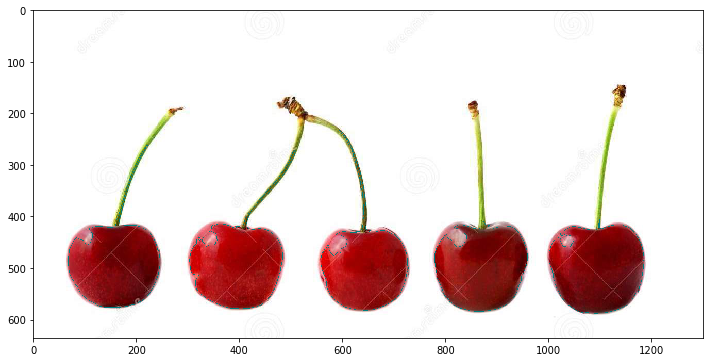

In [21]:
# make copy of image
cherries_and_contours = np.copy(cherries)

# find contours of large enough area
min_cherry_area = 1200
large_contours = [cnt for cnt in cherries_contours if cv2.contourArea(cnt) > min_cherry_area]

# draw contours
cv2.drawContours(cherries_and_contours, large_contours, -1, (125,125,0))

plt.imshow(cv2.cvtColor(cherries_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cherries-contour.jpg', cherries_and_contours)

# print number of contours
print('number of cherries: %d' % len(large_contours))

True

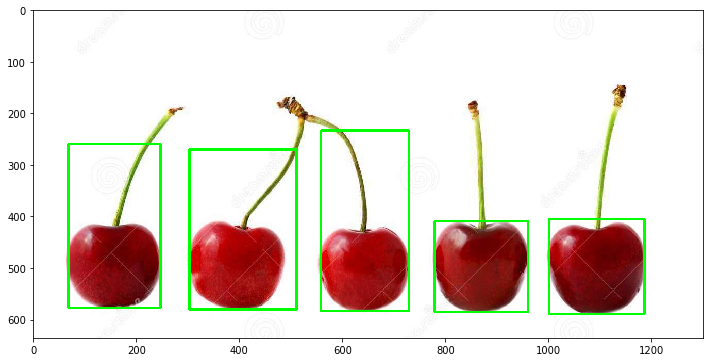

In [22]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(cherries)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cherries-bounding.jpg', bounding_img)

#### Gaussian Blur

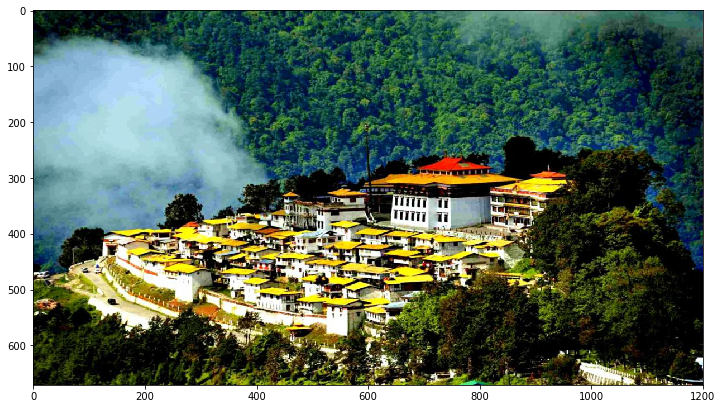

In [23]:
tawang = cv2.imread('images/Tawang1.jpg')
plt.imshow(cv2.cvtColor(tawang, cv2.COLOR_BGR2RGB))

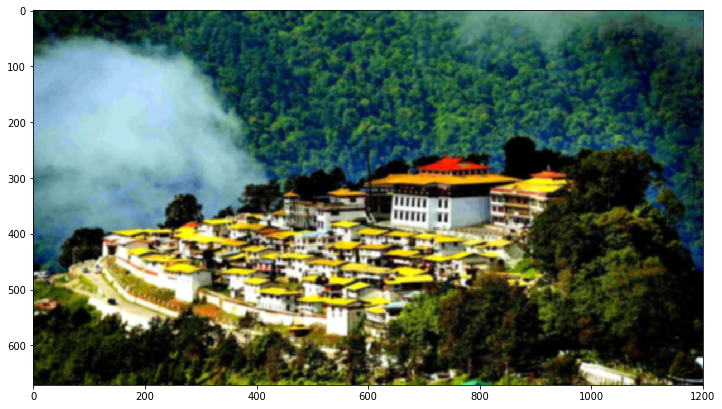

In [24]:
# preproccess with blurring, with 9x9 kernel
tawang_blur_small = cv2.GaussianBlur(tawang, (9,9), 0)
cv2.imwrite('output/oy-gaussian-blur-9.jpg', tawang_blur_small)
plt.imshow(cv2.cvtColor(tawang_blur_small, cv2.COLOR_BGR2RGB))

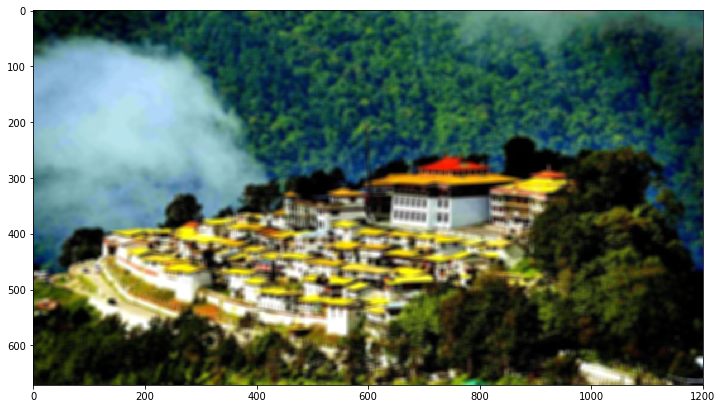

In [25]:
tawang_blur_small = cv2.GaussianBlur(tawang, (9,9), 25)
cv2.imwrite('output/oy-gaussian-blur-9-3.jpg', tawang_blur_small)
plt.imshow(cv2.cvtColor(tawang_blur_small, cv2.COLOR_BGR2RGB))

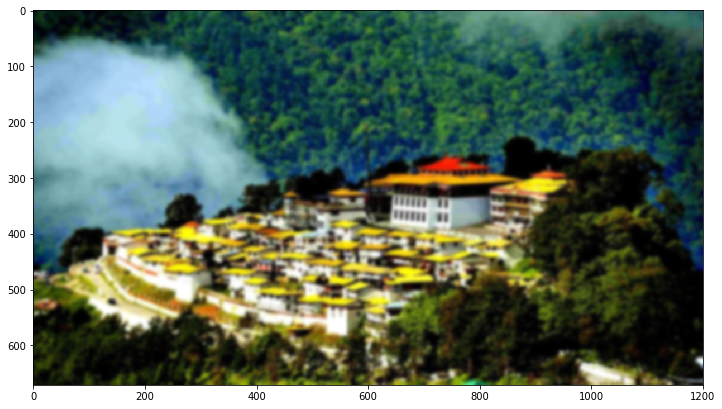

In [26]:
tawang_blur_small = cv2.GaussianBlur(tawang, (17,17), 0)
cv2.imwrite('output/oy-gaussian-blur-17.jpg', tawang_blur_small)
plt.imshow(cv2.cvtColor(tawang_blur_small, cv2.COLOR_BGR2RGB))

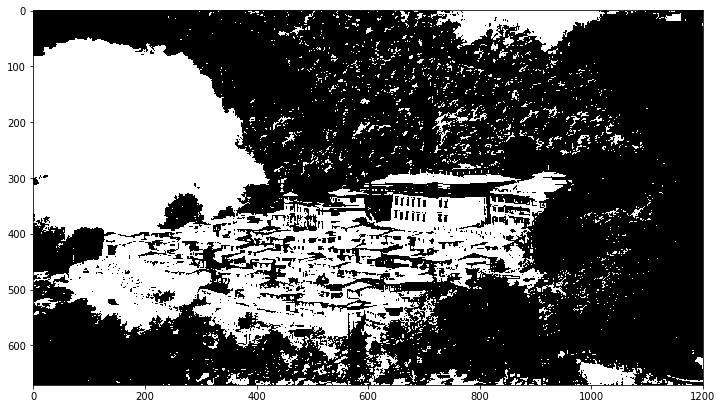

In [27]:
# threshold on regular image
gray_tawang = cv2.cvtColor(tawang, cv2.COLOR_BGR2GRAY)
_, threshold_tawang = cv2.threshold(gray_tawang, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/tawang-no-blur-thresh.jpg', threshold_tawang)

plt.imshow(cv2.cvtColor(threshold_tawang, cv2.COLOR_GRAY2RGB))

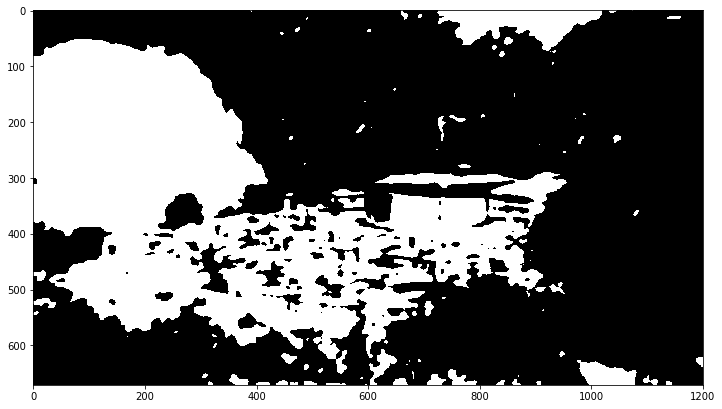

In [28]:
#threshold on blurred image
gray_blur_tawang = cv2.cvtColor(tawang_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_tawang_blur = cv2.threshold(gray_blur_tawang, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/tawang-gaussian-blur-5-thresh.jpg', threshold_tawang_blur)
plt.imshow(cv2.cvtColor(threshold_tawang_blur, cv2.COLOR_GRAY2RGB))

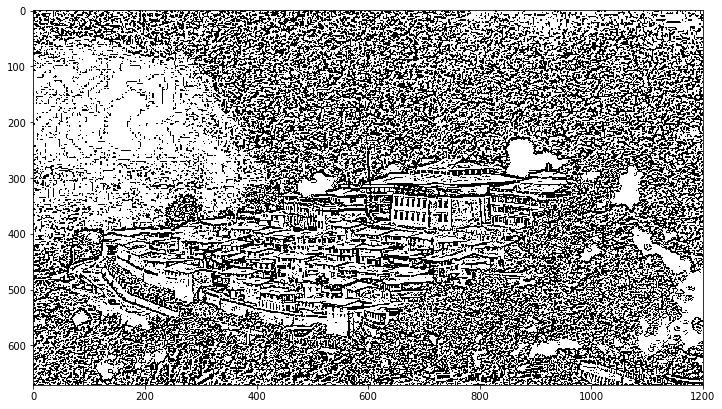

In [29]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_tawang,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

#### Edge detection

True

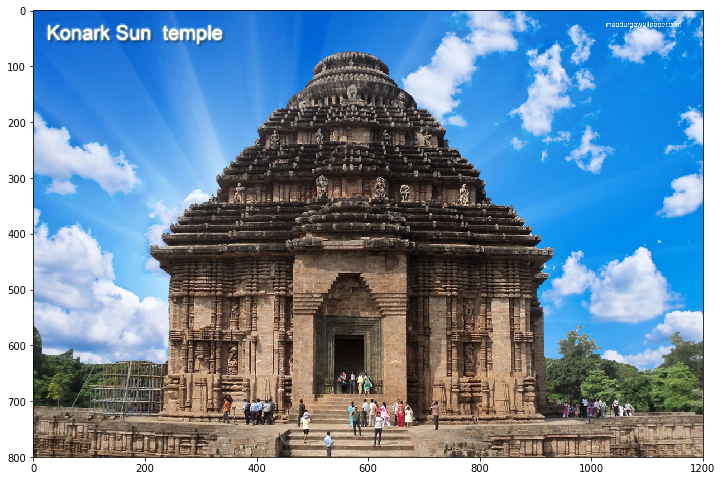

In [30]:
konark = cv2.imread('images/konark-sun-temple.jpg')
plt.imshow(cv2.cvtColor(konark, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/konark-orig.jpg', konark)

In [31]:
# preprocess by blurring and grayscale
konark_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(konark, (7,7), 0), cv2.COLOR_BGR2GRAY)

True

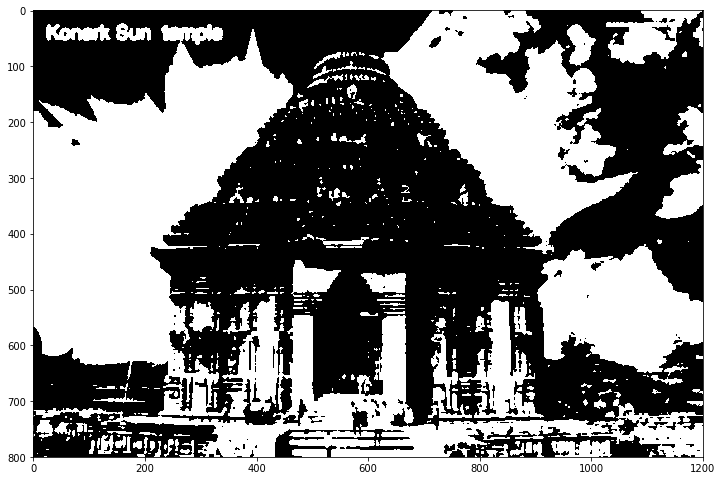

In [32]:
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, konark_thresh = cv2.threshold(konark_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(konark_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/konark-thresh-low.png', konark_thresh)

_, konark_thresh_hi = cv2.threshold(konark_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/konark-thresh-hi.png', konark_thresh_hi)

True

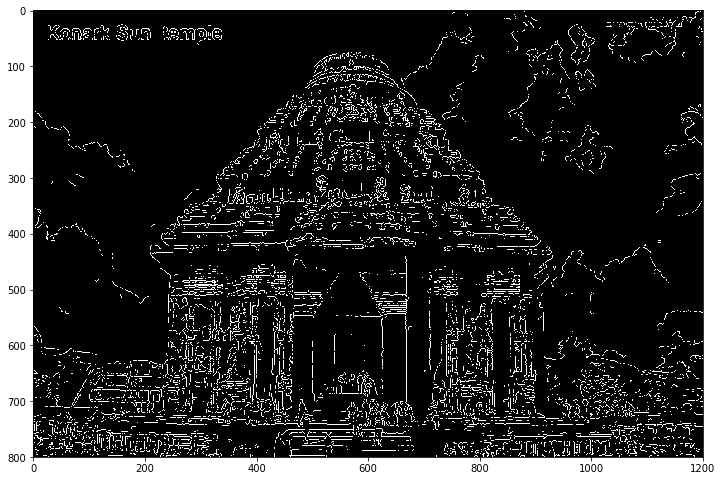

In [33]:
# find binary image with edges
konark_edges = cv2.Canny(konark_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(konark_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/konark-edges.png', konark_edges)

#### Corner detection

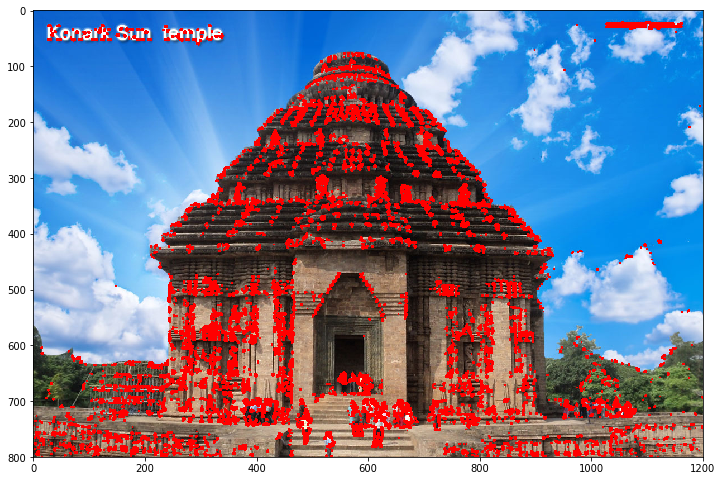

In [34]:
harris_test = konark.copy()
#greyscale the image
grey = cv2.cvtColor(harris_test, cv2.COLOR_BGR2GRAY)

grey = np.float32(grey)
kernel_size = 3
block_size = 4

dst = cv2.cornerHarris(grey, block_size, kernel_size, 0.05)

#
dst = cv2.dilate(dst,None)

harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

#### Basic Image Flip

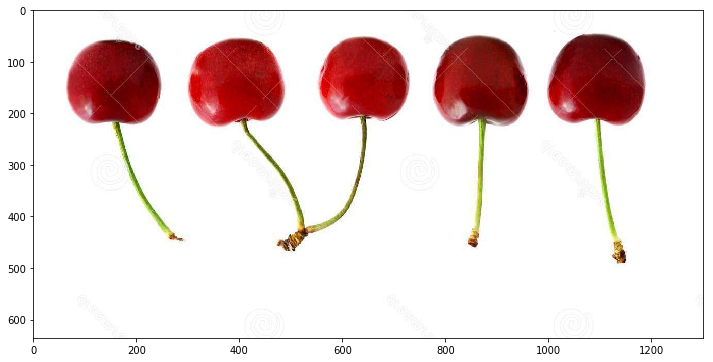

In [35]:
# vertical flip
plt.imshow(cv2.flip(cv2.cvtColor(cherries, cv2.COLOR_BGR2RGB),0))

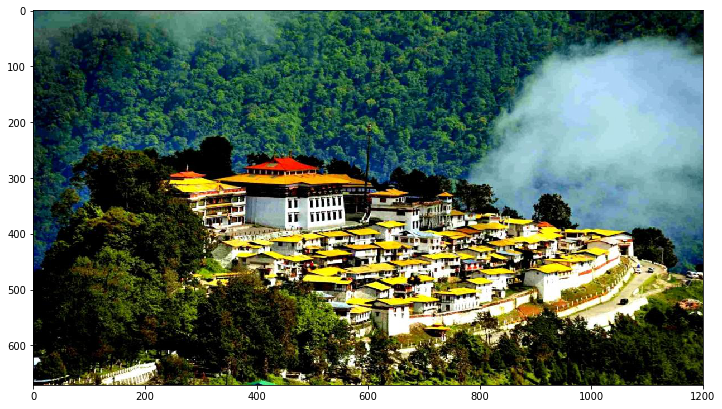

In [36]:
# vertical flip
plt.imshow(cv2.flip(cv2.cvtColor(tawang, cv2.COLOR_BGR2RGB),1))

#### Basic face detection

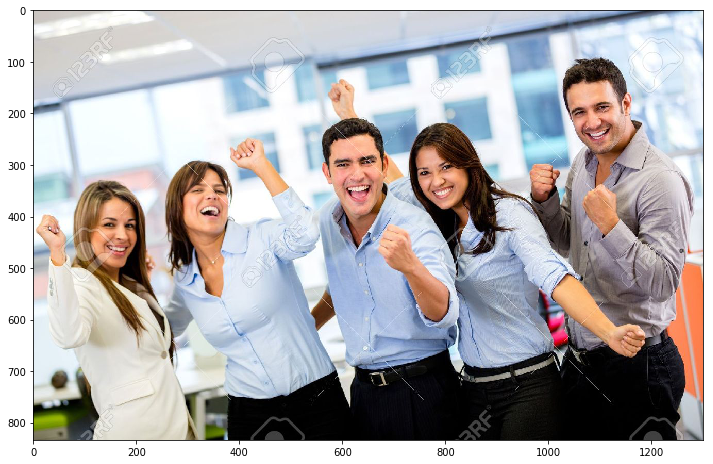

In [37]:
face_image = cv2.imread('images/faces.jpg')
grey = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

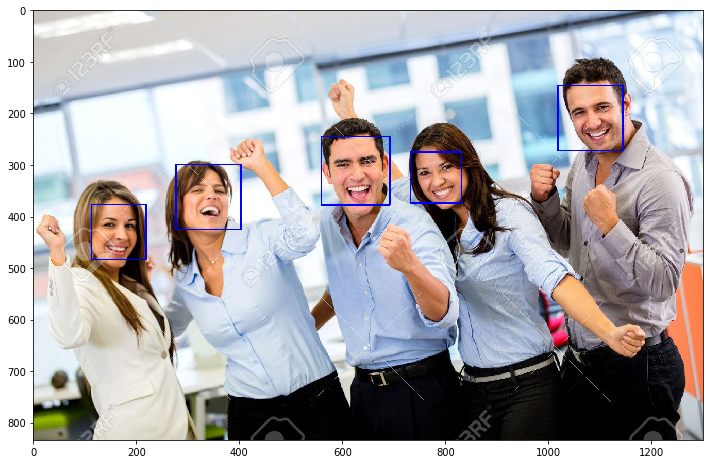

In [38]:
# this is a pre-trained face cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(face_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

#### Note:
* Images are sourced from bing image search and shutterstock 


* Documentation and tutorials on using opencv with python can be found at: https://docs.opencv.org/3.1.0/db/d27/tutorial_py_table_of_contents_feature2d.html


* More on Harris corner detection: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html


* A few useful tutorials and more information (incl. Viola-Jones detection algorithm & Haar cascade feature detection) can be found at:

    https://www.youtube.com/watch?v=_QZLbR67fUU
    
    https://www.youtube.com/watch?v=F5rysk51txQ
    